In [2]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

(1000, 3)


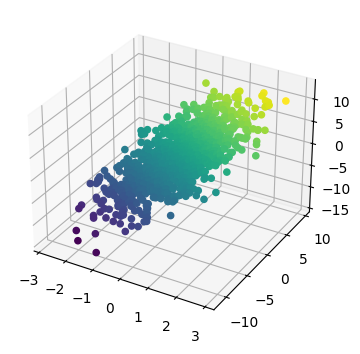

In [3]:

N = 1000 # number of entries

def build_dataset(N):
    mu1 = 0 # mean of x1
    sigma1 = 1 # standard deviation of x1
    mu2 = 0 # mean of x2
    sigma2 = 3 # standard deviation of x2

    x1 = np.random.normal(mu1, sigma1, N)
    #print(x1,x1.shape) # 1000x1 vector
   
    x2 = x1 + np.random.normal(mu2, sigma2, N)
    x3 = 2*x1 + x2

    A = np.stack((x1, x2, x3), axis=1)
    print(A.shape) # 1000x3 matrix


    # plot the data
   
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, x3, c=x3, alpha=1)
    plt.show()

    return A

A = build_dataset(N)



In [4]:
def exercise_1(A):    
  

    # compute covariance matrix
    cov_matrix = np.cov(A,rowvar=False) # each column is a variable
    print(cov_matrix.shape)

    print('-------1.Find the eigenvectors and eigenvalues using eigendecomposition of the covariance matrix------')
    # find eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    print('The eigenvalues ',eigenvalues,end='\n\n')
    print('The eigenvectors are',eigenvectors,end='\n\n')
    #print('The sqrt of eigenvalues are:',np.sqrt(eigenvalues[:min(10,3)]))

    for ev in eigenvectors:
        np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

    print('-------2. --------------')

    # find eigenvectors and eigenvalues using SVD
    # Compute the SVD of the matrix
    # Compute the singular value decomposition of the dataset
    U, S, V = np.linalg.svd(A)
    S= S** 2 / (A.shape[1] - 1)
    print('S is ',S)
    print('U is ',U)
  
    
    print('-------3.Variance explained by componet --------------')

    
    # compute the variance explained by each principal component
    tot = np.sum(eigenvalues)
    variance_explained = eigenvalues / tot * 100
    sorted_var_explained = variance_explained[::-1].sort() #sort in descending order
    for i in range(3):
        print('The variance explained by the principal component ',i+1,' is ',variance_explained[i],'%')
    print('The variance explained by the first two principal components is ',variance_explained[0]+variance_explained[1],'%')

    

exercise_1(A)

(3, 3)
-------1.Find the eigenvectors and eigenvalues using eigendecomposition of the covariance matrix------
The eigenvalues  [ 2.86765479e+01 -3.09765446e-15  1.83565848e+00]

The eigenvectors are [[-0.11143586 -0.81649658  0.56649394]
 [-0.58237469 -0.40824829 -0.70297444]
 [-0.80524641  0.40824829  0.43001344]]

-------2. --------------
S is  [1.43340198e+04 9.17836460e+02 9.01755435e-29]
U is  [[-5.00059661e-02 -3.59145076e-02  2.63712164e-01 ...  3.44214076e-02
   4.36177482e-02 -2.15942176e-02]
 [-3.26358290e-02  4.37609412e-03 -9.00648308e-01 ...  5.01446852e-04
   2.62769422e-02  4.68362143e-03]
 [ 3.81050233e-02 -5.11637495e-02 -1.79049305e-03 ...  6.59351161e-04
   5.31614523e-02  3.98523565e-02]
 ...
 [ 2.14999601e-02  2.69202795e-02 -8.59055109e-03 ...  9.98880310e-01
  -1.42085390e-03  6.99052128e-04]
 [ 1.76841963e-02  5.96417395e-02  1.87828131e-02 ... -1.88901033e-03
   9.95452401e-01 -7.65924068e-04]
 [-3.19747411e-02  1.11367220e-02  1.51349182e-02 ...  3.47459595e-0

In [5]:
def Perform_PCA(A,n_components):
    pca = PCA(n_components=n_components)
    pca = pca.fit(A)
    A_transformed = pca.transform(A)
    print(A_transformed.shape)
    return A_transformed


A_transformed = Perform_PCA(A,0.99)


(1000, 2)


In [6]:
def plot(A_transformed):
    data = A_transformed
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()

    colors = np.random.rand(1000)

    plt.scatter(data[:, 0], data[:, 1], c=colors, alpha=0.5)
    plt.show()

    # Scatter plot
    
#plot(A_transformed)


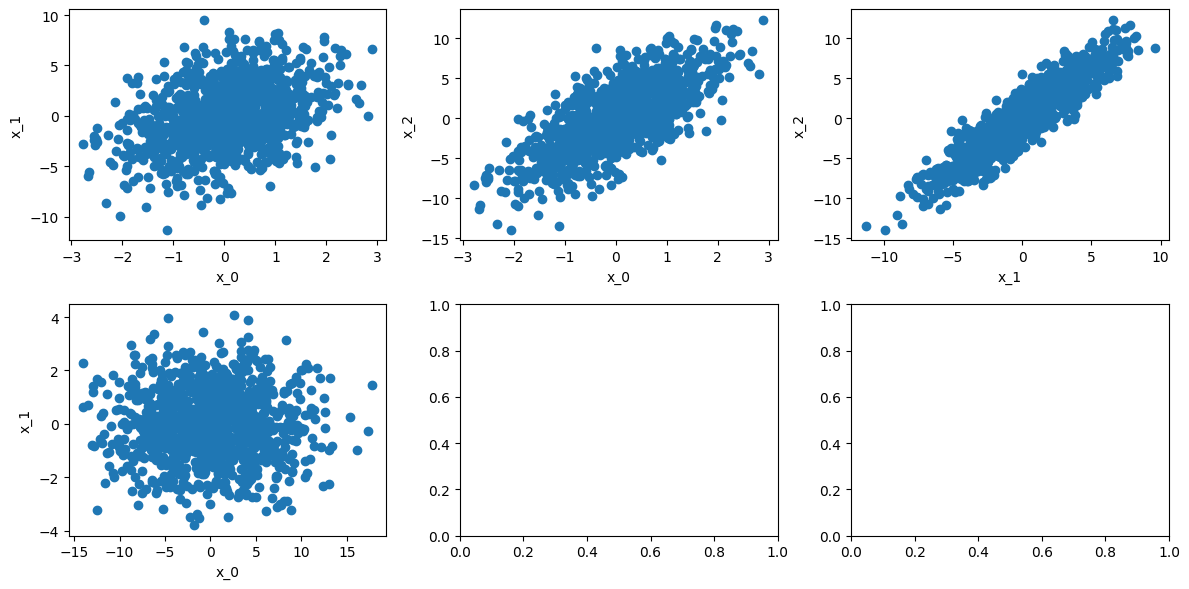

In [8]:
def PlotData(A,A_transformed):

    fig, ax = plt.subplots(2, 3, figsize=(12, 6))
    # plot data in [x_0, x_1] projection
    ax[0, 0].scatter(A[:, 0], A[:, 1])
    ax[0, 0].set_xlabel('x_0')
    ax[0, 0].set_ylabel('x_1')

    # plot data in [x_0, x_2] projection
    ax[0, 1].scatter(A[:, 0], A[:, 2])
    ax[0, 1].set_xlabel('x_0')
    ax[0, 1].set_ylabel('x_2')

    # plot data in [x_1, x_2] projection
    ax[0, 2].scatter(A[:, 1], A[:, 2])
    ax[0, 2].set_xlabel('x_1')
    ax[0, 2].set_ylabel('x_2')

    # plot data in [x_0', x_1'] projection
    ax[1, 0].scatter(A_transformed[:, 0], A_transformed[:, 1])
    ax[1, 0].set_xlabel('x_0')
    ax[1, 0].set_ylabel('x_1')

    # plot data in [x_0', x_2'] projection
    #ax[1, 1].scatter(A_transformed[:, 0], A_transformed[:, 2])
    #ax[1, 1].set_xlabel('x_0')
    #ax[1, 1].set_ylabel('x_2')

    # plot data in [x_1', x_2'] projection
    #ax[1, 2].scatter(A_transformed[:, 1], A_transformed[:, 2])
    #ax[1, 2].set_xlabel('x_1')
    #ax[1, 2].set_ylabel('x_2')




PlotData(A,A_transformed)

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [10]:
def AddNoise(A):
    data = A
    # generate noise data
    noise = np.random.normal(size=(1000, 10), scale=0.1)
    # add noise to original data
    data_noisy = np.concatenate((data, noise), axis=1)
    print(data_noisy.shape)
    return data_noisy

data_noisy = AddNoise(A)


(1000, 13)


(1000, 2)


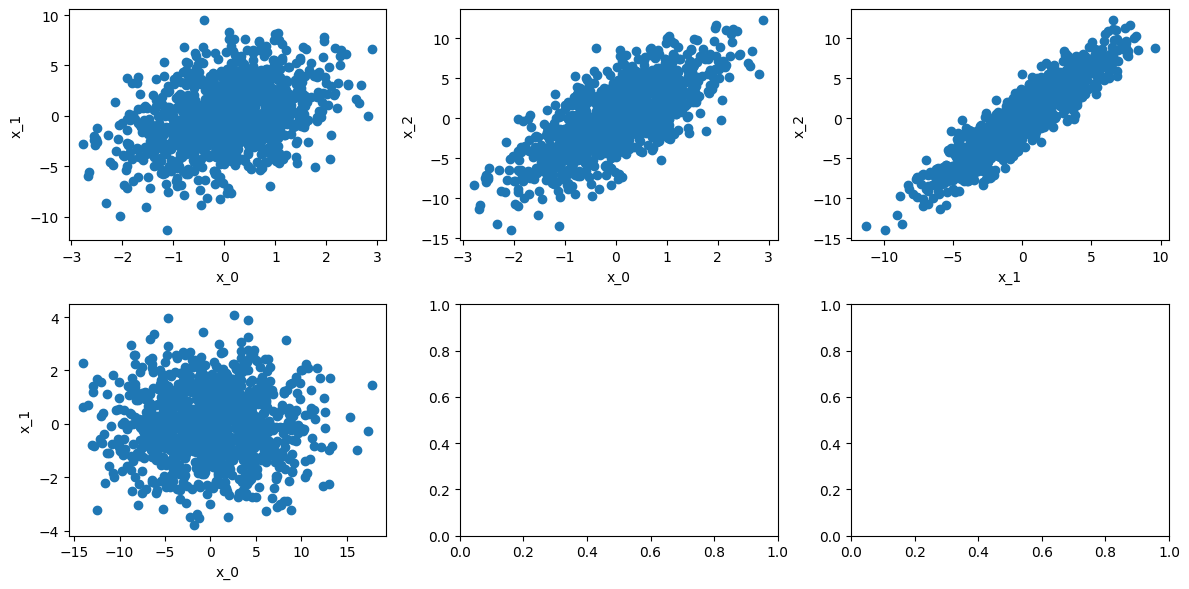

In [11]:
data_noisy_transformed = Perform_PCA(data_noisy,n_components=0.99)
PlotData(data_noisy,data_noisy_transformed)


3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [12]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [ ]:

from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [ ]:
def ReadData():
    # read the dataset
    df = pd.read_csv('data/magic04.data', header=None)
    df.columns=['fLength(mm)', 'fWidth(mm)', 'fSize', 'fConc(ratio)', 'fConc1(ratio)','fAsym(mm)','fM3Long(mm)','fM3Trans(mm)','fAlpha(degree)','fDist(mm)','class']
    # read the dataset description
    with open('data/magic04.names') as f:
        description = f.read()
    print(df.head(5))
    return df

magic04 = ReadData()


   fLength(mm)  fWidth(mm)   fSize  fConc(ratio)  fConc1(ratio)  fAsym(mm)  \
0      28.7967     16.0021  2.6449        0.3918         0.1982    27.7004   
1      31.6036     11.7235  2.5185        0.5303         0.3773    26.2722   
2     162.0520    136.0310  4.0612        0.0374         0.0187   116.7410   
3      23.8172      9.5728  2.3385        0.6147         0.3922    27.2107   
4      75.1362     30.9205  3.1611        0.3168         0.1832    -5.5277   

   fM3Long(mm)  fM3Trans(mm)  fAlpha(degree)  fDist(mm) class  
0      22.0110       -8.2027         40.0920    81.8828     g  
1      23.8238       -9.9574          6.3609   205.2610     g  
2     -64.8580      -45.2160         76.9600   256.7880     g  
3      -6.4633       -7.1513         10.4490   116.7370     g  
4      28.5525       21.8393          4.6480   356.4620     g  


In [ ]:
def Perform_PCA2(magic04):
    # data scaling
    magic04_scaled = StandardScaler().fit_transform(magic04.iloc[:,:-1])
    #magic04_scaled = pd.DataFrame(magic04_scaled, columns=magic04.columns[:-1])
    #print(magic04_scaled.head(5))
    pca = PCA(n_components=2)
 
    pca.fit(magic04_scaled)
    reduced = pca.transform(magic04_scaled)
    
    print('Shape before PCA: ', magic04_scaled.shape)
    print('Shape after PCA: ', reduced.shape)
    
    pca_df = pd.DataFrame(
        data=reduced, 
        columns=['PC1', 'PC2']
    )

 
    pca_df['class'] = magic04['class']

    
    print(pca_df.head(5))
    print('The expained variance is : ', pca.explained_variance_)
    return pca_df


magic04_pca = Perform_PCA2(magic04)


Shape before PCA:  (19020, 10)
Shape after PCA:  (19020, 2)
        PC1       PC2 class
0 -1.016550 -0.369256     g
1 -1.679961 -0.549225     g
2  5.966242  1.831316     g
3 -2.557060 -0.031629     g
4  1.655853 -0.552902     g
The expained variance is :  [4.22421299 1.57527072]


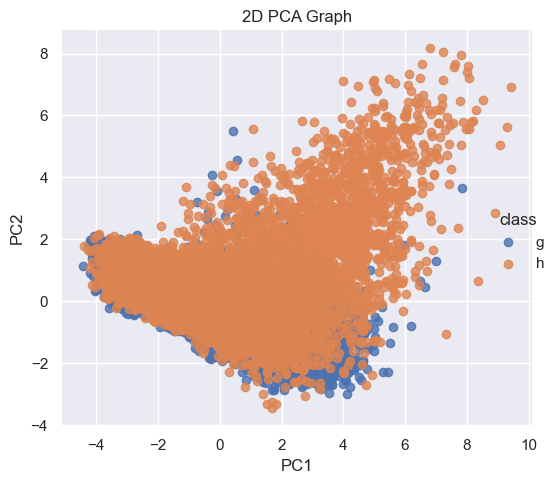

In [ ]:
def plot2(pca_df):
  
    sns.set()
    sns.lmplot(
        x='PC1', 
        y='PC2', 
        data=pca_df, 
        hue='class', 
        fit_reg=False, 
        legend=True
    )
 
    plt.title('2D PCA Graph')
    plt.show()

plot2(magic04_pca)


